#Flower Classification using CNN


1. Install Kaggle Library

In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###2. Upload API Json file from Kaggle

In [3]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle (1).json


###3. Downloading the Dataset from Server and Unzipping it

In [4]:
!mkdir ~/.
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.’: File exists


In [5]:
! kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2

##4. Split the Dataset into Training, Testing and Validation data

In [7]:
! pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import splitfolders
input_folder='/content/flowers'
splitfolders.ratio(input_folder,output="dataset",seed=42,ratio=(.8,.2,.0),group_prefix=None)

Copying files: 4317 files [00:01, 2184.85 files/s]


##5. Import Required Keras Modules from Tensorflow

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [10]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

##6. Image Augmentation - Preprocessing

In [11]:
#import the preprocess library of image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,rotation_range=10,width_shift_range=0.3,height_shift_range=0.3,horizontal_flip=True,vertical_flip=True)
#rescale =  pixel value rescaling to 0 to 1 from 0 to 255
#shear_range => counter clock wise rotation(anti clock)

In [13]:
test_datagen  = ImageDataGenerator(rescale=1./255)

In [85]:
#load your images data
train_val = train_datagen.flow_from_directory(r"/content/dataset/train",target_size=(180,180),batch_size=32,class_mode="categorical")

Found 3452 images belonging to 5 classes.


In [81]:
test_val = test_datagen.flow_from_directory(r"/content/dataset/val",target_size=(180,180),batch_size=32,class_mode="categorical")

Found 860 images belonging to 5 classes.


In [82]:
train_val.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## Displaying Images from Training Dataset

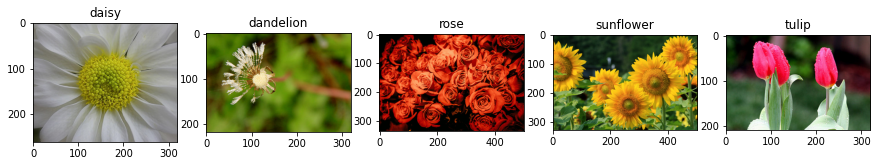

In [157]:
from skimage import io
f=['/content/dataset/train/daisy/100080576_f52e8ee070_n.jpg','/content/dataset/train/dandelion/10200780773_c6051a7d71_n.jpg','/content/flowers/rose/10503217854_e66a804309.jpg','/content/dataset/train/sunflower/1008566138_6927679c8a.jpg','/content/dataset/train/tulip/100930342_92e8746431_n.jpg']
class_names=['daisy','dandelion','rose','sunflower','tulip']
x, axarr = plt.subplots(1,5,figsize=(15,15))
for i in range(5):
  axarr[i].imshow(io.imread(f[i]))
  axarr[i].title.set_text(class_names[i])


##7. Building the CNN Model

In [86]:
model = Sequential()

##8. Adding Convolution layers, Maxpooling, Flatten, Dense/Hidden Layers and Output Layer

In [87]:
model.add(Convolution2D(32,(3,3),input_shape=(180,180,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))


In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 20, 20, 64)      

##9. Compile the Model

In [89]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

##10. Model Fitting, Training and Validation

In [90]:
records=model.fit_generator(train_val,steps_per_epoch=108,epochs=15,validation_data=test_val,validation_steps=27)
#steps_per_epoch = no of train images/batch size
#validation_steps = no of test images/batch size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15
108/108 [==============================] - 178s 2s/step - loss: 1.3801 - accuracy: 0.4009 - val_loss: 1.2002 - val_accuracy: 0.4953
Epoch 2/15
108/108 [==============================] - 175s 2s/step - loss: 1.1455 - accuracy: 0.5226 - val_loss: 1.0350 - val_accuracy: 0.5535
Epoch 3/15
108/108 [==============================] - 176s 2s/step - loss: 1.0260 - accuracy: 0.5863 - val_loss: 0.9051 - val_accuracy: 0.6477
Epoch 4/15
108/108 [==============================] - 176s 2s/step - loss: 0.9857 - accuracy: 0.6118 - val_loss: 0.8551 - val_accuracy: 0.6477
Epoch 5/15
108/108 [==============================] - 186s 2s/step - loss: 0.9196 - accuracy: 0.6367 - val_loss: 0.7555 - val_accuracy: 0.7023
Epoch 6/15
108/108 [==============================] - 175s 2s/step - loss: 0.8836 - accuracy: 0.6486 - val_loss: 0.7555 - val_accuracy: 0.7070
Epoch 7/15
108/108 [==============================] - 180s 2s/step - loss: 0.8854 - accuracy: 0.6532 - val_loss: 0.7785 - val_accuracy: 0.7058

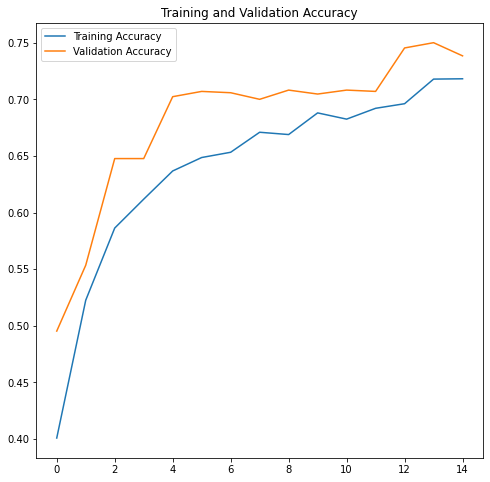

In [91]:
epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, records.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, records.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

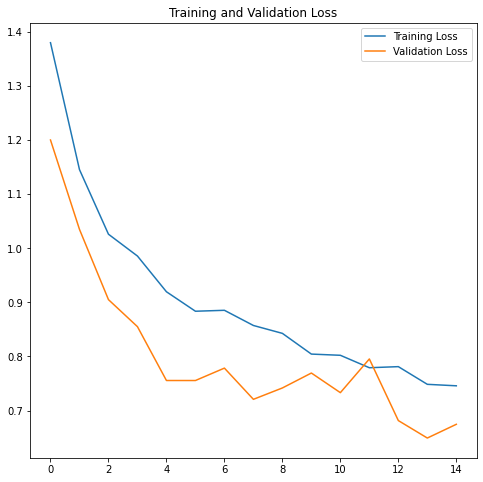

In [92]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, records.history['loss'], label='Training Loss')
plt.plot(epochs_range, records.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [93]:
model.save("Flowers_CNN1.h5")

In [94]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [137]:
model = load_model("Flowers_CNN1.h5")

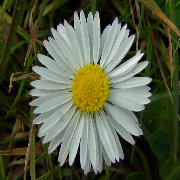

In [146]:
img = image.load_img("/Daisy-7-1.jpg",target_size=(180,180,3))
img

In [147]:
type(img)




PIL.Image.Image

In [148]:
x = image.img_to_array(img)
x

array([[[16., 20.,  3.],
        [ 8., 14.,  2.],
        [10., 11.,  3.],
        ...,
        [21., 50.,  6.],
        [21., 50.,  4.],
        [47., 78.,  8.]],

       [[ 4.,  4.,  2.],
        [12., 13.,  5.],
        [11., 12.,  6.],
        ...,
        [22., 52.,  2.],
        [45., 78.,  9.],
        [61., 96.,  2.]],

       [[ 0.,  0.,  0.],
        [14., 15., 10.],
        [20., 24., 10.],
        ...,
        [46., 78., 11.],
        [61., 98.,  3.],
        [63., 97., 11.]],

       ...,

       [[38., 44., 16.],
        [37., 47., 13.],
        [39., 56.,  1.],
        ...,
        [16., 31.,  2.],
        [17., 30.,  2.],
        [16., 29.,  1.]],

       [[27., 38.,  4.],
        [35., 50.,  9.],
        [37., 58.,  1.],
        ...,
        [18., 28.,  1.],
        [20., 30.,  3.],
        [18., 28.,  1.]],

       [[22., 33.,  0.],
        [32., 46., 10.],
        [35., 62.,  9.],
        ...,
        [18., 28.,  1.],
        [21., 32.,  2.],
        [20., 31.,  1.]]

In [149]:
x.shape

(180, 180, 3)

In [150]:
x = np.expand_dims(x,axis=0)

In [151]:
x.shape

(1, 180, 180, 3)

In [152]:
pred_prob = model.predict(x)

In [153]:
pred_id = pred_prob.argmax(axis=1)[0]
pred_id

0

In [159]:
print("Predicted Flower is ",str(class_names[pred_id]))

Predicted Flower is  daisy


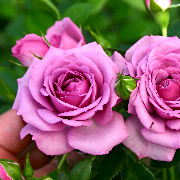

In [160]:
img = image.load_img("/test_fl2.jpg",target_size=(180,180,3))
img

In [161]:
type(img)

PIL.Image.Image

In [162]:
x = image.img_to_array(img)
x

array([[[ 46.,  98.,  26.],
        [ 43., 103.,  33.],
        [ 43., 105.,  28.],
        ...,
        [ 60., 102.,  38.],
        [ 57.,  99.,  36.],
        [ 46.,  92.,  28.]],

       [[ 43.,  95.,  21.],
        [ 43.,  96.,  18.],
        [ 49., 104.,  23.],
        ...,
        [ 63., 108.,  43.],
        [ 59.,  98.,  41.],
        [ 56.,  89.,  32.]],

       [[ 38.,  93.,   2.],
        [ 42.,  95.,   3.],
        [ 46., 100.,  16.],
        ...,
        [ 64., 108.,  45.],
        [ 61., 101.,  39.],
        [ 49.,  92.,  38.]],

       ...,

       [[198.,  90., 148.],
        [216.,  96., 158.],
        [232.,  95., 163.],
        ...,
        [ 10.,  42.,   1.],
        [  7.,  37.,   1.],
        [  1.,  30.,   0.]],

       [[114., 117.,  62.],
        [197.,  98., 152.],
        [224.,  95., 159.],
        ...,
        [ 16.,  43.,   2.],
        [ 16.,  43.,   0.],
        [  6.,  38.,   0.]],

       [[ 57.,  92.,   0.],
        [110., 143.,  56.],
        [165.,  

In [163]:
x.shape

(180, 180, 3)

In [164]:
x = np.expand_dims(x,axis=0)

In [165]:
x.shape

(1, 180, 180, 3)

In [166]:
pred_prob = model.predict(x)

In [167]:
pred_id = pred_prob.argmax(axis=1)[0]
pred_id

2

In [168]:
print("Predicted Flower is ",str(class_names[pred_id]))

Predicted Flower is  rose
